In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [3]:
# Save the input and target variables

data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [4]:
# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [6]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    
    return model

model = get_model()

In [7]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.9537 - mae: 0.8153 - val_loss: 1.1677 - val_mae: 0.9736
Epoch 2/100
6/6 - 0s - loss: 0.8882 - mae: 0.7850 - val_loss: 1.0149 - val_mae: 0.8892
Epoch 3/100
6/6 - 0s - loss: 0.7716 - mae: 0.7155 - val_loss: 0.7693 - val_mae: 0.7340
Epoch 4/100
6/6 - 0s - loss: 0.6666 - mae: 0.6736 - val_loss: 0.5561 - val_mae: 0.6123
Epoch 5/100
6/6 - 0s - loss: 0.6086 - mae: 0.6360 - val_loss: 0.4804 - val_mae: 0.5698
Epoch 6/100
6/6 - 0s - loss: 0.5772 - mae: 0.6384 - val_loss: 0.6437 - val_mae: 0.6120
Epoch 7/100
6/6 - 0s - loss: 0.5960 - mae: 0.6215 - val_loss: 0.4260 - val_mae: 0.5504
Epoch 8/100
6/6 - 0s - loss: 0.5355 - mae: 0.6083 - val_loss: 0.4111 - val_mae: 0.5049
Epoch 9/100
6/6 - 0s - loss: 0.5201 - mae: 0.5775 - val_loss: 0.3485 - val_mae: 0.4964
Epoch 10/100
6/6 - 0s - loss: 0.5144 - mae: 0.5913 - val_loss: 0.3422 - val_mae: 0.4888
Epoch 11/100
6/6 - 0s - loss: 0.5075 - mae: 0.5696 - val_loss: 0.4242 - val_mae: 0.5140
Epoch 12/100
6/6 - 0s - loss: 0.4881 - ma

Epoch 95/100
6/6 - 0s - loss: 0.0420 - mae: 0.1510 - val_loss: 0.5686 - val_mae: 0.5838
Epoch 96/100
6/6 - 0s - loss: 0.0449 - mae: 0.1524 - val_loss: 0.5313 - val_mae: 0.5381
Epoch 97/100
6/6 - 0s - loss: 0.0461 - mae: 0.1626 - val_loss: 0.5743 - val_mae: 0.5815
Epoch 98/100
6/6 - 0s - loss: 0.0803 - mae: 0.2299 - val_loss: 0.5385 - val_mae: 0.5637
Epoch 99/100
6/6 - 0s - loss: 0.0556 - mae: 0.1842 - val_loss: 0.5189 - val_mae: 0.5381
Epoch 100/100
6/6 - 0s - loss: 0.0453 - mae: 0.1586 - val_loss: 0.5641 - val_mae: 0.5845


In [10]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 1.2093 - mae: 0.8437


[1.2092664241790771, 0.8436778783798218]

#### Plot the learning curves

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

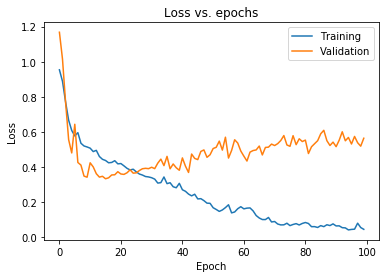

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [14]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(1)
    ])
    
    return model

In [15]:
# Re-build the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.9668 - mae: 0.8217 - val_loss: 1.2173 - val_mae: 0.9937
Epoch 2/100
6/6 - 0s - loss: 0.9624 - mae: 0.8169 - val_loss: 1.1964 - val_mae: 0.9834
Epoch 3/100
6/6 - 0s - loss: 0.9425 - mae: 0.8085 - val_loss: 1.1233 - val_mae: 0.9530
Epoch 4/100
6/6 - 0s - loss: 0.8978 - mae: 0.7918 - val_loss: 0.9554 - val_mae: 0.8733
Epoch 5/100
6/6 - 0s - loss: 0.7741 - mae: 0.7407 - val_loss: 0.6232 - val_mae: 0.6842
Epoch 6/100
6/6 - 0s - loss: 0.6399 - mae: 0.6649 - val_loss: 0.4601 - val_mae: 0.5236
Epoch 7/100
6/6 - 0s - loss: 0.6625 - mae: 0.6557 - val_loss: 0.4161 - val_mae: 0.5164
Epoch 8/100
6/6 - 0s - loss: 0.5650 - mae: 0.6140 - val_loss: 0.4411 - val_mae: 0.5630
Epoch 9/100
6/6 - 0s - loss: 0.6511 - mae: 0.6641 - val_loss: 0.4533 - val_mae: 0.5756
Epoch 10/100
6/6 - 0s - loss: 0.5857 - mae: 0.6438 - val_loss: 0.4483 - val_mae: 0.5558
Epoch 11/100
6/6 - 0s - loss: 0.5940 - mae: 0.6159 - val_loss: 0.3825 - val_mae: 0.5218
Epoch 12/100
6/6 - 0s - loss: 0.6061 - ma

Epoch 95/100
6/6 - 0s - loss: 0.3955 - mae: 0.5068 - val_loss: 0.3890 - val_mae: 0.4959
Epoch 96/100
6/6 - 0s - loss: 0.3689 - mae: 0.4843 - val_loss: 0.3882 - val_mae: 0.4833
Epoch 97/100
6/6 - 0s - loss: 0.3830 - mae: 0.4855 - val_loss: 0.3964 - val_mae: 0.4869
Epoch 98/100
6/6 - 0s - loss: 0.3831 - mae: 0.4934 - val_loss: 0.4192 - val_mae: 0.5032
Epoch 99/100
6/6 - 0s - loss: 0.3931 - mae: 0.5036 - val_loss: 0.4035 - val_mae: 0.4913
Epoch 100/100
6/6 - 0s - loss: 0.3881 - mae: 0.4942 - val_loss: 0.4392 - val_mae: 0.5088


In [18]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.6237 - mae: 0.6026


[0.6236792206764221, 0.602633535861969]

#### Plot the learning curves

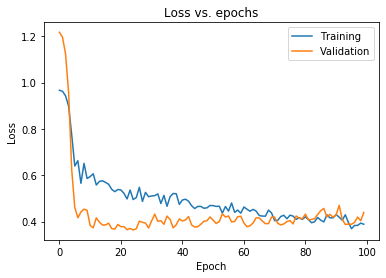

In [19]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()